In [1]:
# Install dependencies
!pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Yakshith
[nltk_data]     Shettigar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load datasets
df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')

# Add labels
df_fake['label'] = 'fake'
df_real['label'] = 'real'

# Combine datasets
df = pd.concat([df_fake[['title', 'text', 'label']], df_real[['title', 'text', 'label']]])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle
df.head()


,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",real


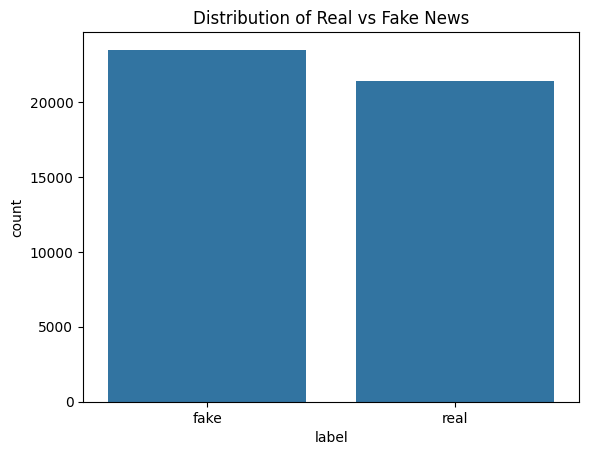

In [4]:
# Plot label distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs Fake News')
plt.show()


In [5]:
# Clean text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

df['clean'] = (df['title'] + ' ' + df['text']).fillna('').apply(clean_text)


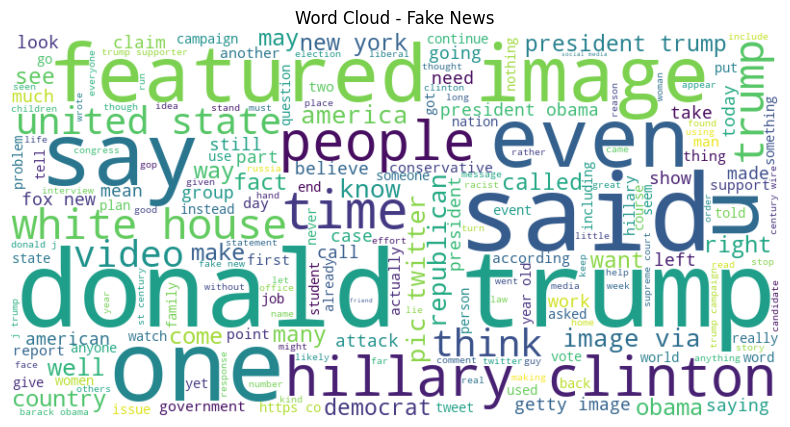

In [6]:
fake_words = ' '.join(df[df['label']=='fake']['clean'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Fake News')
plt.show()


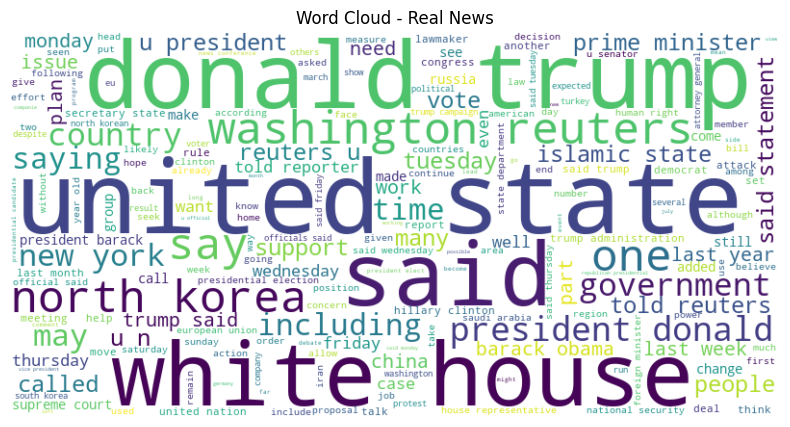

In [7]:
real_words = ' '.join(df[df['label']=='real']['clean'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real News')
plt.show()


In [8]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=5)
X = vectorizer.fit_transform(df['clean'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

# Replace SVM with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
# Predict on test data
y_pred = model.predict(X_test)


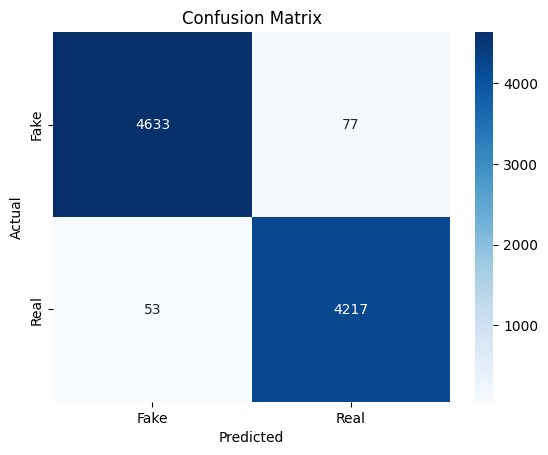

In [18]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['fake', 'real'])

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)[0]
    print(f"Prediction: {prediction.upper()}")

# Example
predict_news("Prime Minister announces new education reforms")


Prediction: FAKE
